###  UNIFOR - Mestrado em Inteligência Artificial e Ciência de Dados
### Disciplina: Análise de Dados em Grafos
#### Professor: Raimir
#### Equipe: Maurício Brito, João David e Tiago Pontes  
  
#### Detecção de Comunidades - Algoritmo greedy_modularity_communities (NetworkX)
Algoritmo para enconrtar comunidades no gráfico usando a maximização de modularidade gananciosa de Clauset-Newman-Moore. Este método atualmente suporta a classe Graph e não considera os pesos das arestas.

A maximização da modularidade gananciosa começa com cada nó em sua própria comunidade e se junta ao par de comunidades que mais aumenta a modularidade até que esse par não exista.

### Importa depedências

In [134]:
import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import csv
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import colors as mcolors

### Definição de Funções

In [180]:
# Gera um mapa de cores para uma única comunidade
def cm(G,idx):
    color_map = []
    colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS))
    for no in G.nodes():
        color_map.append(colors[idx])
    return color_map

In [179]:
# Gera um mapa de cores para um grafo com várias comunidades

def cm1(G,lc): #(grafo e lista de comunidades)
    color_map = []
    colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS))
    idx = 0
    for comm in lc:
        for no in comm:
            color_map.append(colors[idx])
        idx += 1
    return color_map

In [181]:
# Identifica as comunidade de um grafo G
def detecta_comunidades(G):
    sets = greedy_modularity_communities(G)
    lc = [list(comunidade) for comunidade in sets]
    print('Total de comunidades:', len(lc))
    return lc #lista de comunidades

In [218]:
# gera os grafos de cada comunidade e apresenta em gráfico
def gera_e_mostra_comunidades(G):
    lista_comunidades = detecta_comunidades(G)
    plt.figure(figsize=(10, 10))
    color_map = cm1(G,lista_comunidades)
    plt.title('Rede e Comunidades')
    if len(G.nodes()) < 100:
        nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color=color_map)
        plt.show()
    else:
        pos = nx.spring_layout(G, k=0.15, iterations=20)
        nx.draw(G, pos=pos, node_size=4, edge_color='b', width=0.05, node_color=color_map)
        plt.show()
    i = 0
    Gc = []
    edges_comunidade = []
    for comunidade in lista_comunidades:
        Gc.append(nx.Graph())  
        for edge in G.edges():
            if edge[0] in comunidade:
                if edge[1] in comunidade:
                    edges_comunidade.append(edge)
        # gera grafos para as comunidades
        Gc[i].add_nodes_from(comunidade)
        Gc[i].add_edges_from(edges_comunidade)
        color_map = cm(Gc[i],i)
        plt.figure(figsize=(10, 10))
        plt.title(f'Comunidades {i} ({len(Gc[i].nodes())} nós e {len(Gc[i].edges())} arestas)')
        if len(Gc[i].nodes()) < 100:
            nx.draw(Gc[i], pos=nx.spring_layout(Gc[i]), with_labels=True, font_weight='bold', font_color="w", node_color=color_map)
            plt.show()
        else:
            pos = nx.spring_layout(Gc[i], k=0.15, iterations=20)
            nx.draw(Gc[i], pos=pos, node_size=4, edge_color='b', width=0.1, node_color=color_map)
            plt.show()
        i += 1
        edges_comunidade = []

### Karatê Club Graph
Zachary’s Karate Club graph

In [211]:
G = nx.karate_club_graph()
print(f'O Grafo possui {len(G.nodes())} nós e {len(G.edges())} arestas')

O Grafo possui 34 nós e 78 arestas


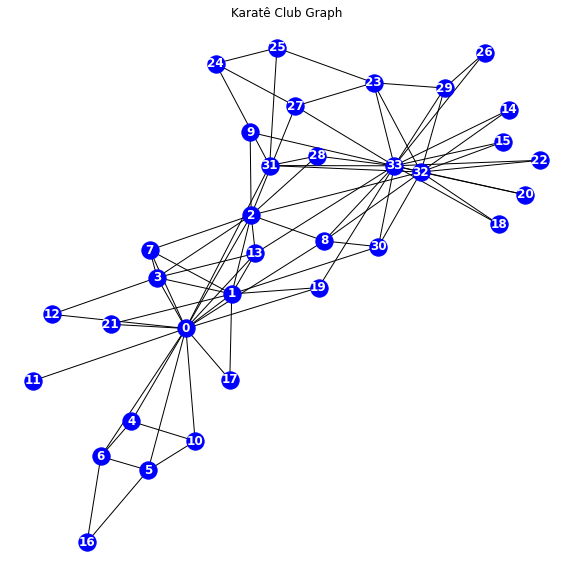

In [212]:
plt.figure(figsize=(10, 10))
plt.title('Karatê Club Graph')
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color='b')

Total de comunidades: 3


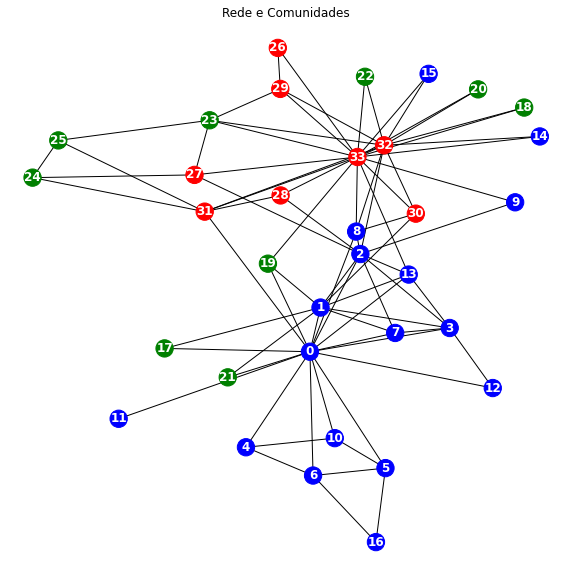

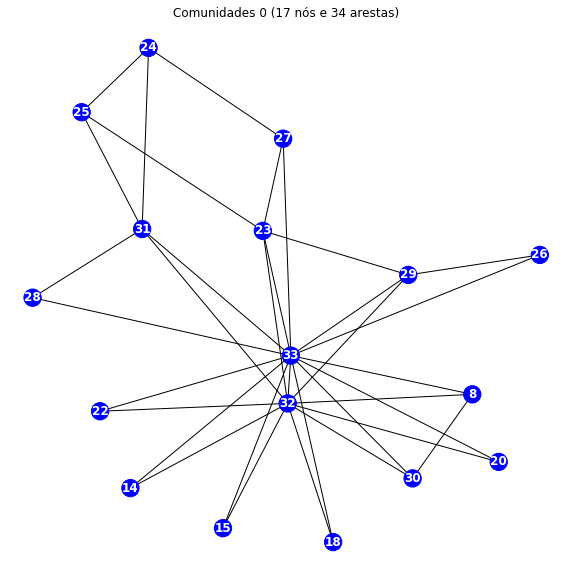

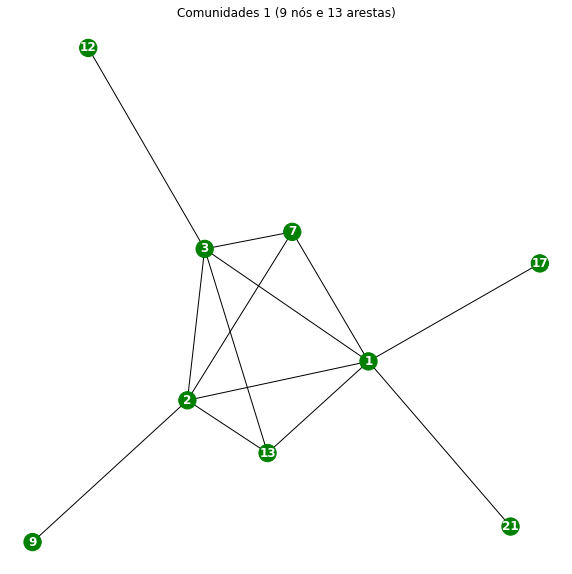

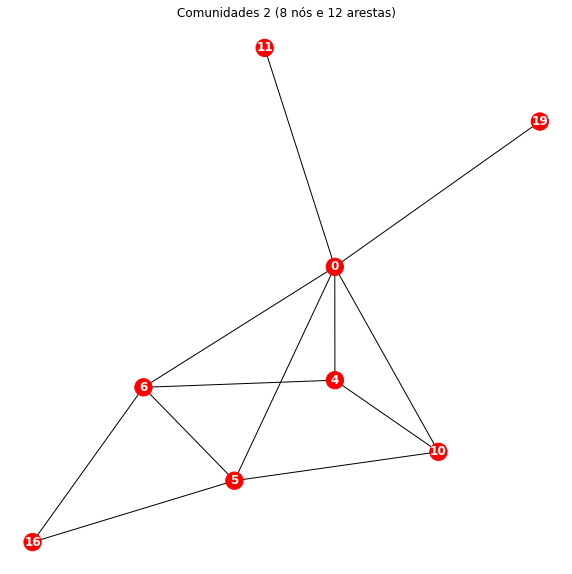

In [213]:
gera_e_mostra_comunidades(G)

### Bitcoin Alpha trust weighted signed network
Esta é a rede de quem confia em quem que negocia usando Bitcoin em uma plataforma chamada Bitcoin Alpha . Como os usuários do Bitcoin são anônimos, é necessário manter um registro da reputação dos usuários para evitar transações com usuários fraudulentos e arriscados. Os membros do Bitcoin Alpha avaliam outros membros em uma escala de -10 (total desconfiança) a +10 (confiança total) em etapas de 1. Esta é a primeira rede explícita, ponderada e dirigida, disponível para pesquisa.

https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html

In [214]:
G = nx.Graph()
node_0 = []
node_1 = []

# Ler o arquivo e separa os nós em duas listas
with open("soc-sign-bitcoinalpha.csv", 'r', encoding='utf-8') as file:
    arquivo = csv.reader(file)
    for linha in arquivo:
        node_0.append(linha[0])
        node_1.append(linha[1])
        
# Adiciona os nós do grafo bipartido
G.add_nodes_from(node_0)
G.add_nodes_from(node_1)

# Gera as arestas do grafo
for i in range(len(node_0)):
    G.add_edge(node_0[i],node_1[i])

In [215]:
print(f'O Grafo possui {len(G.nodes())} nós e {len(G.edges())} arestas')

O Grafo possui 3783 nós e 14124 arestas


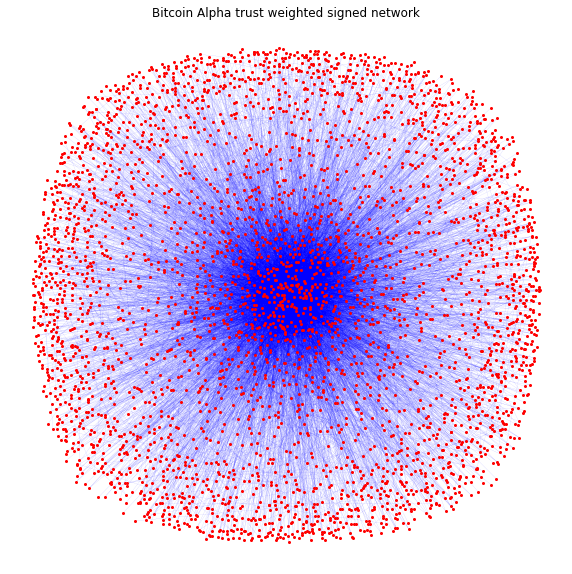

In [216]:
plt.figure(figsize=(10, 10))
plt.title('Bitcoin Alpha trust weighted signed network')
pos = nx.spring_layout(G, k=0.15, iterations=20)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
nx.draw(G, pos=pos, node_size=4, node_color='r', edge_color='b', width=0.05)

Total de comunidades: 42


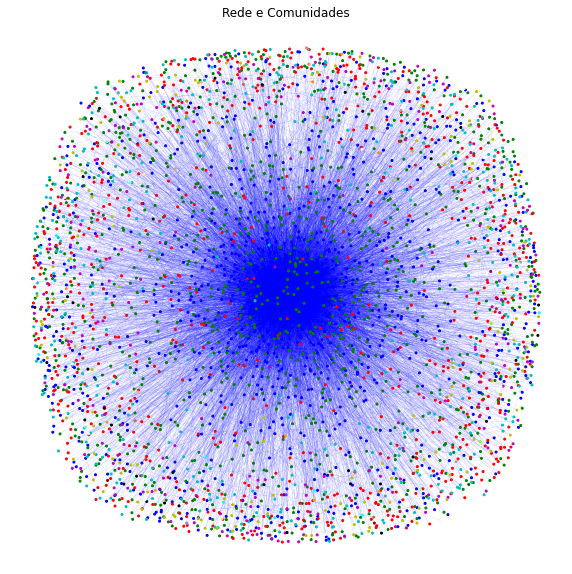

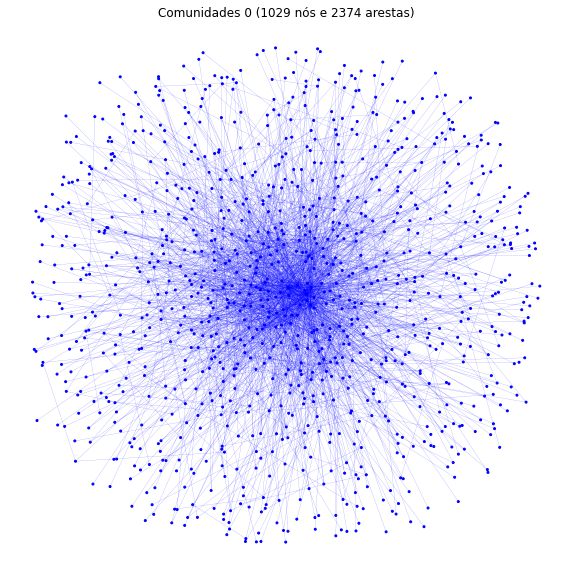

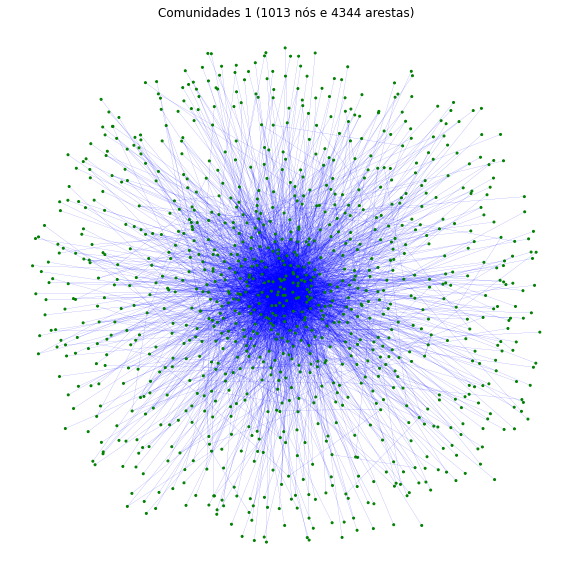

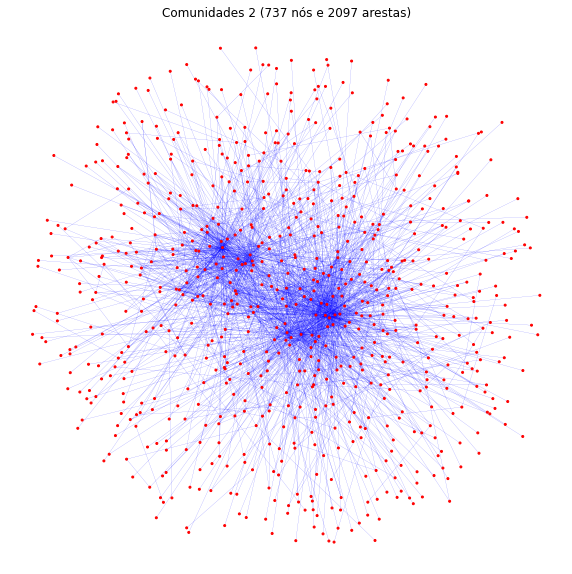

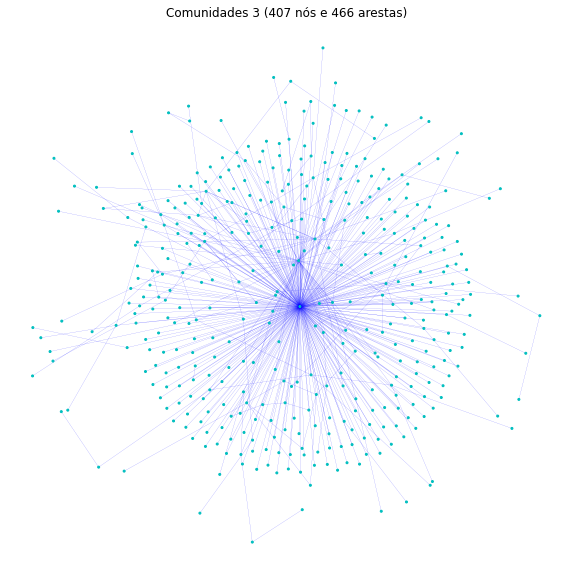

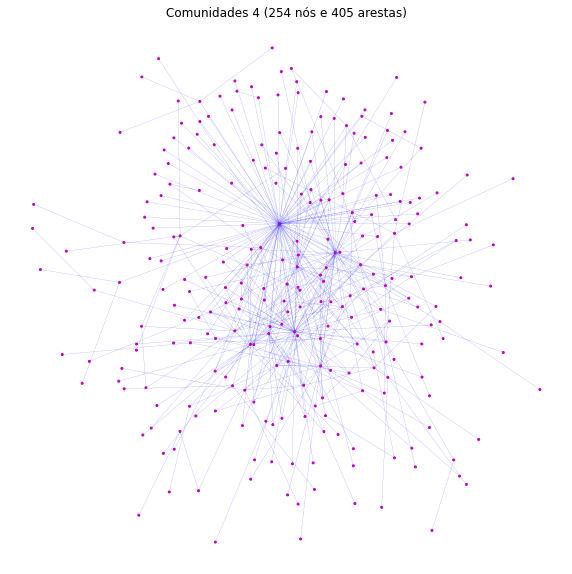

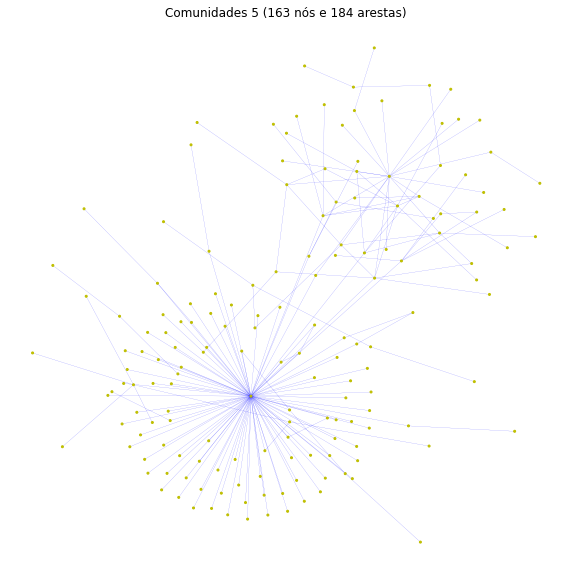

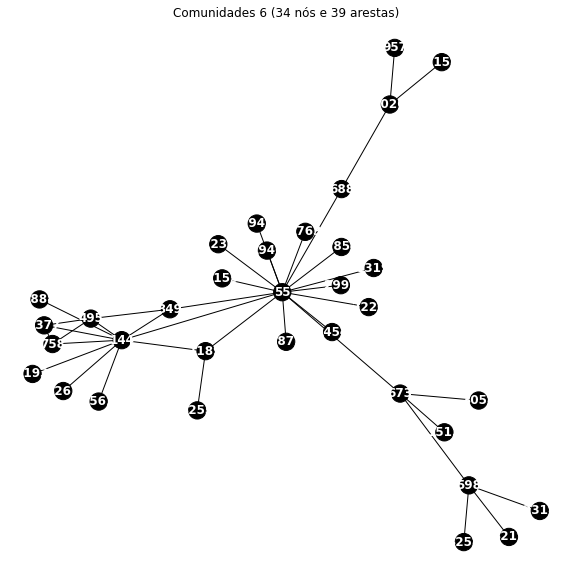

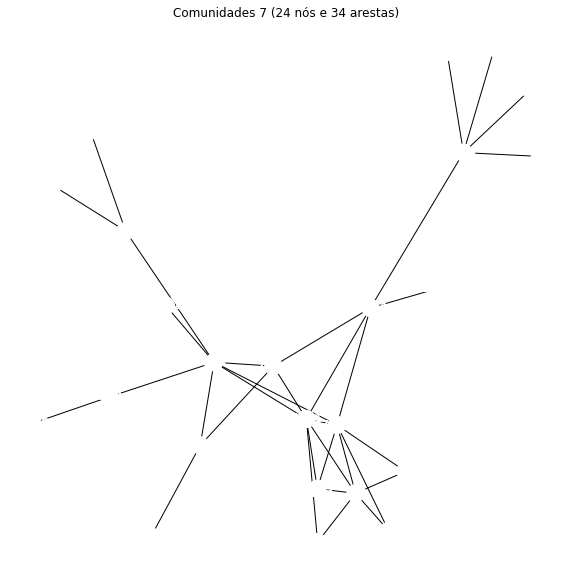

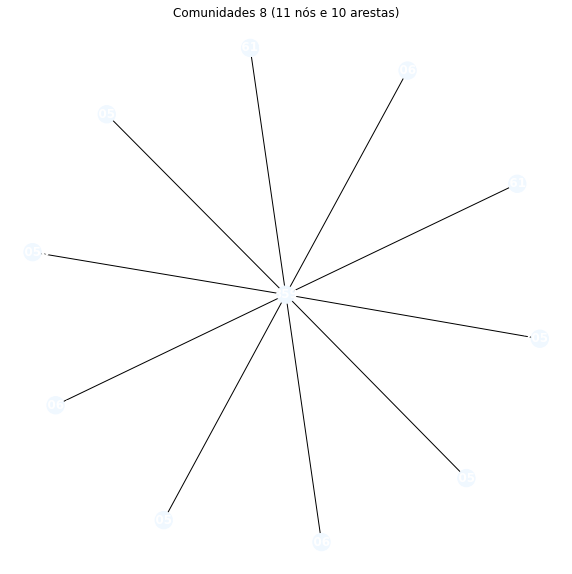

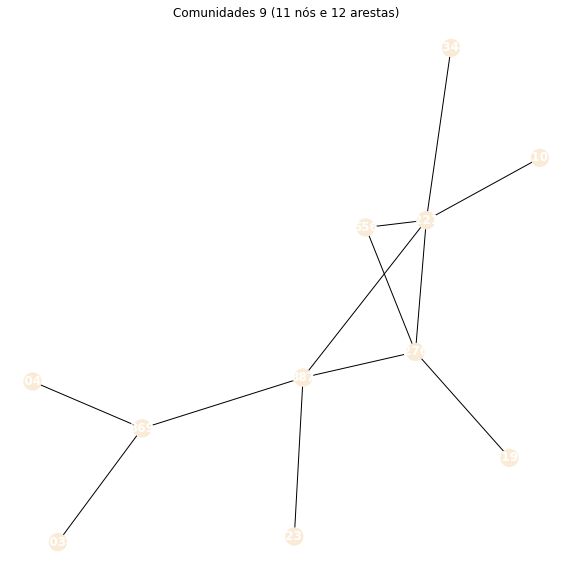

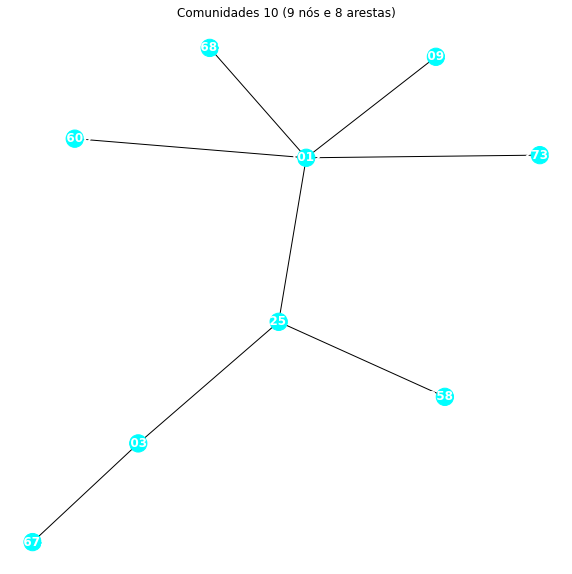

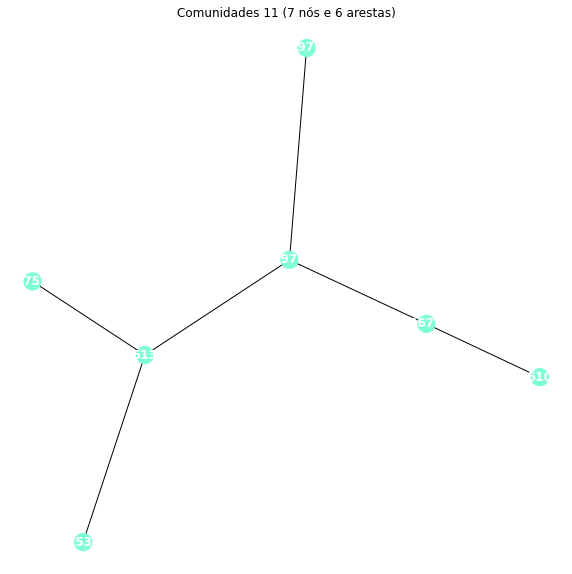

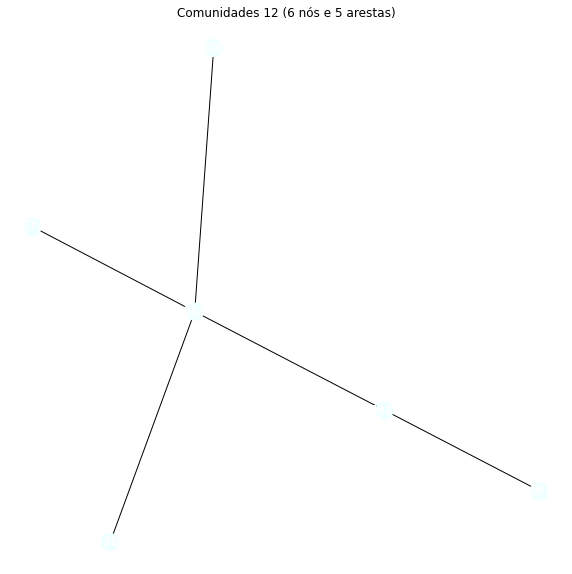

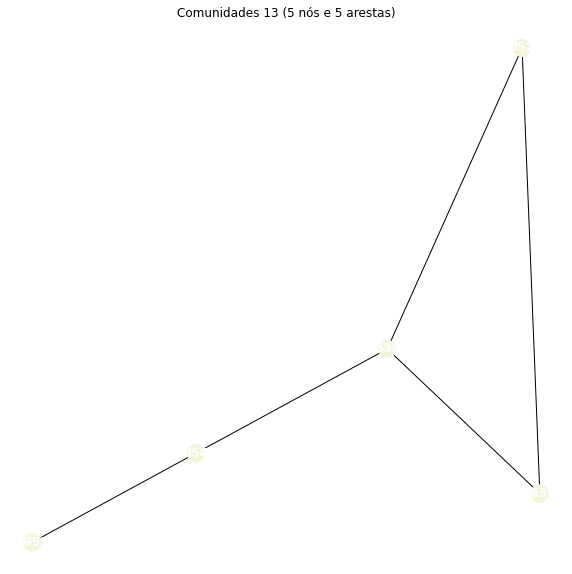

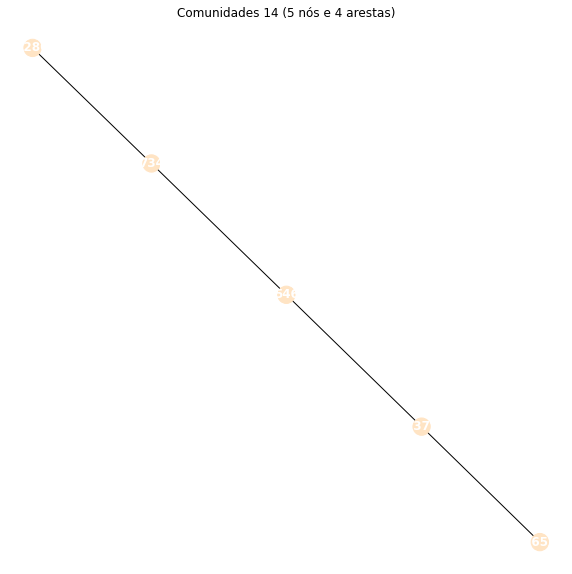

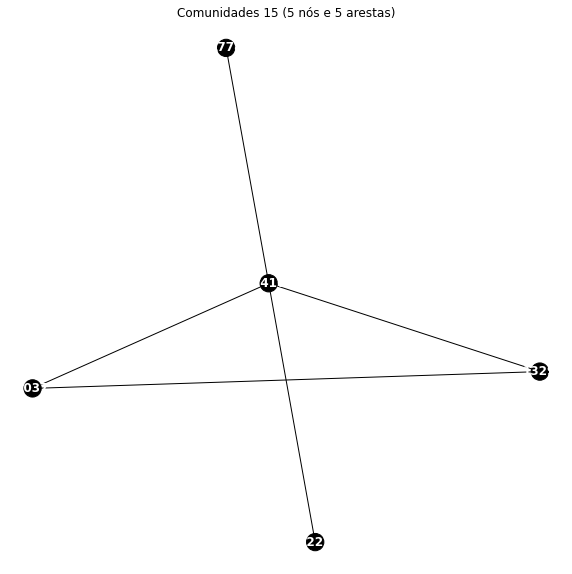

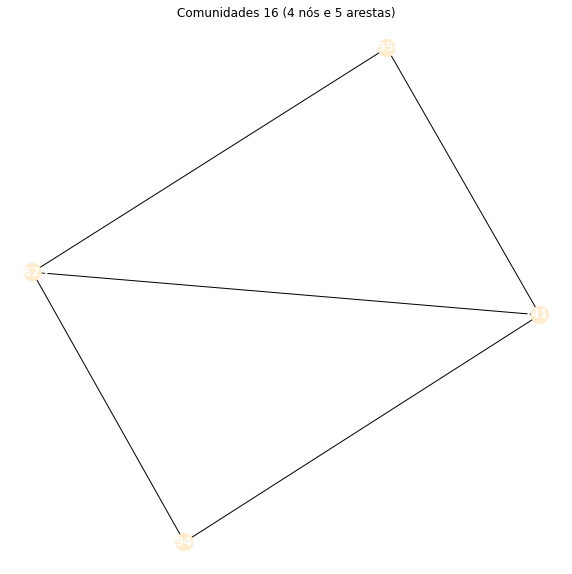

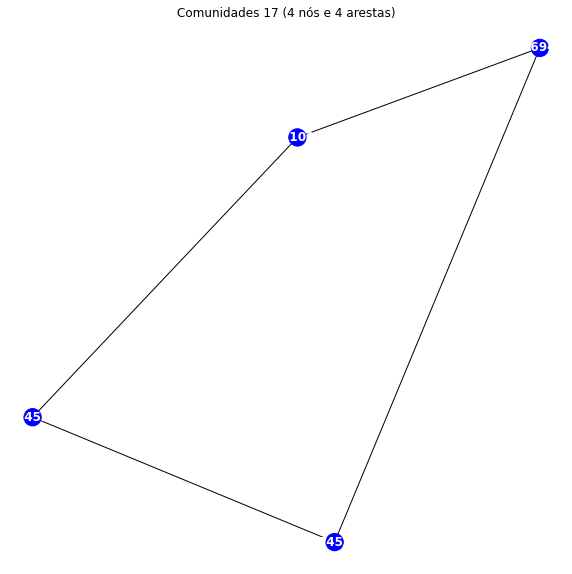

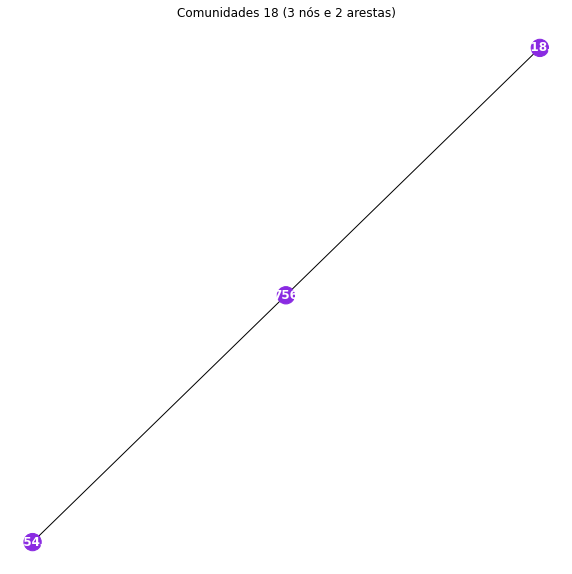

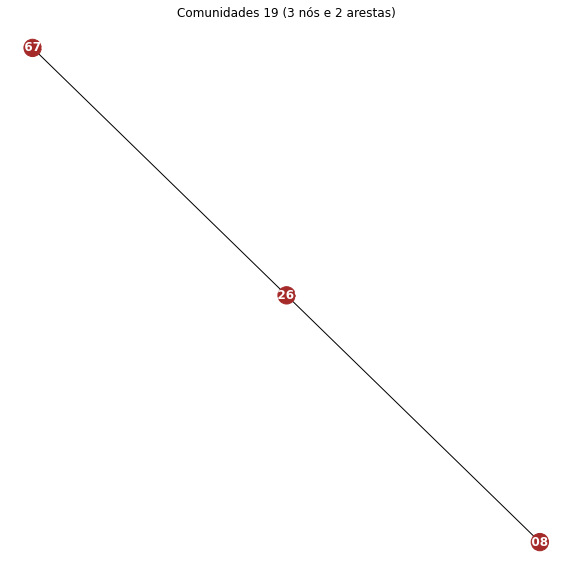

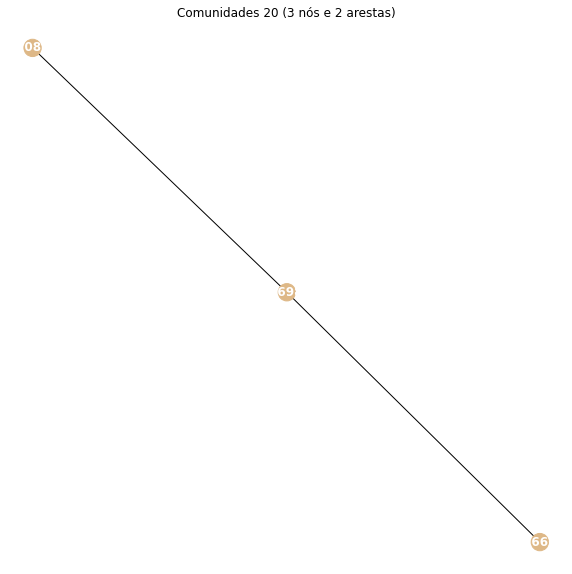

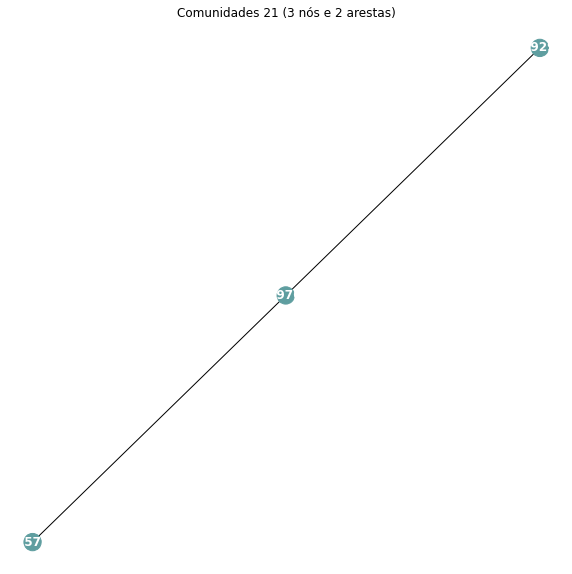

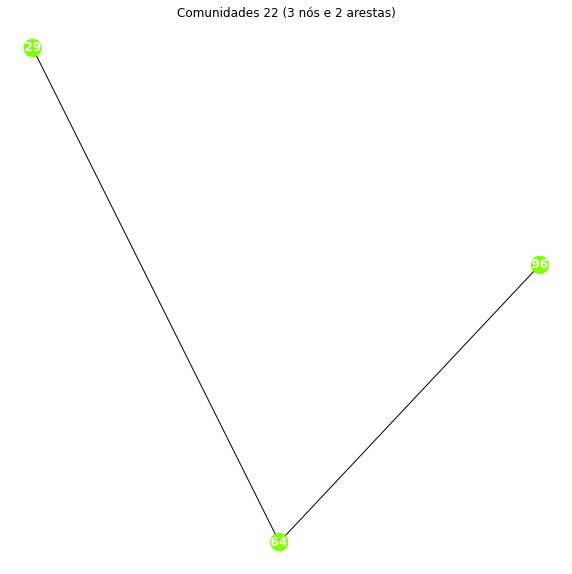

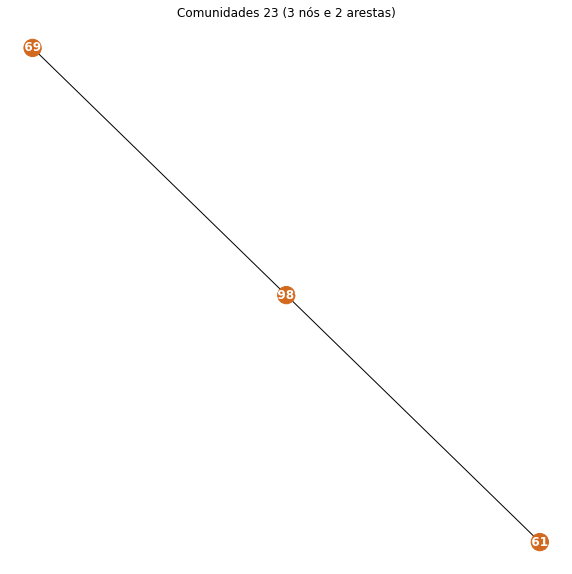

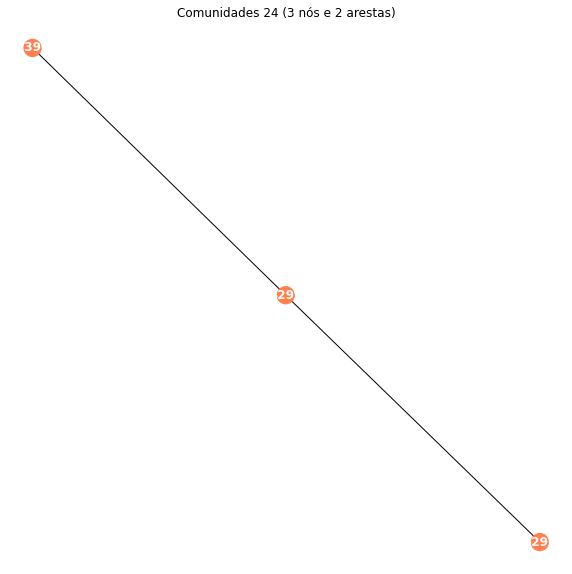

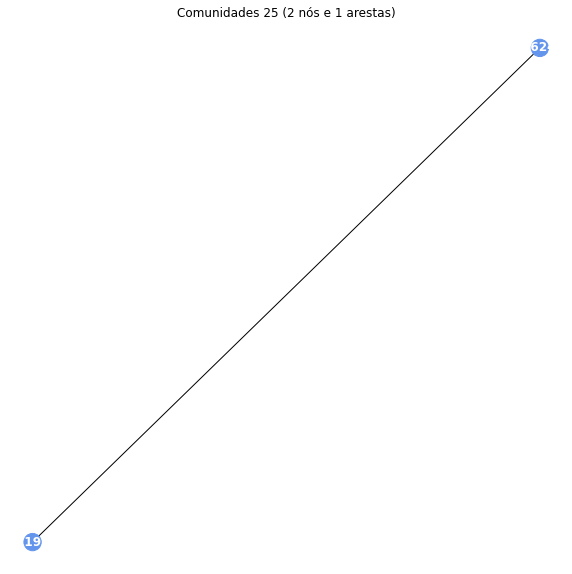

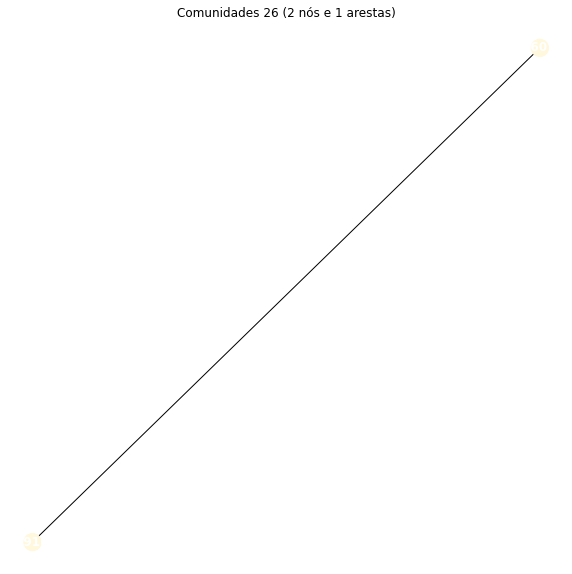

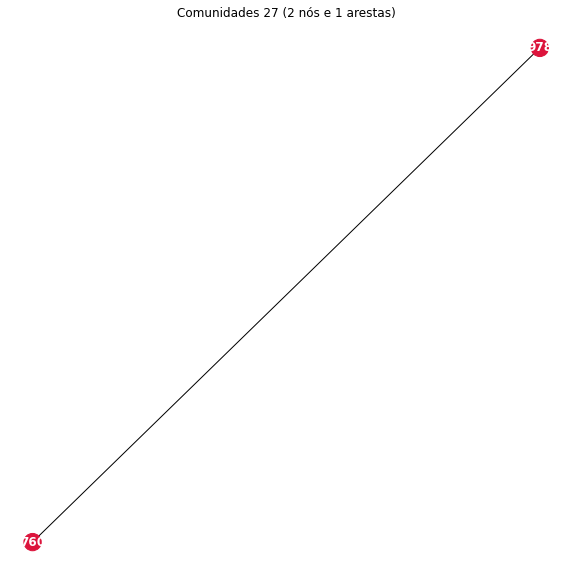

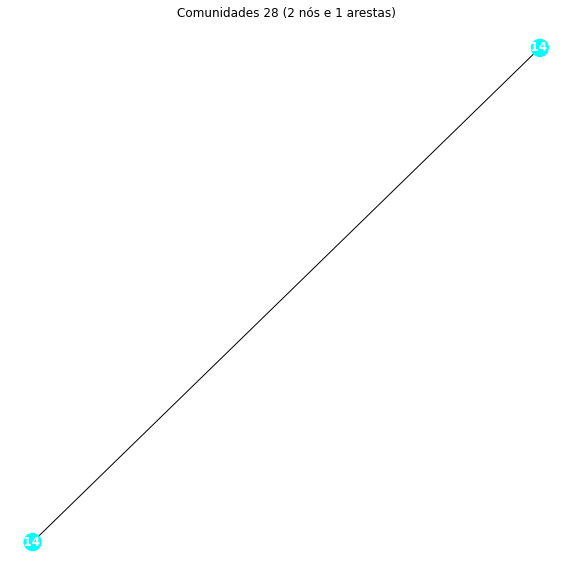

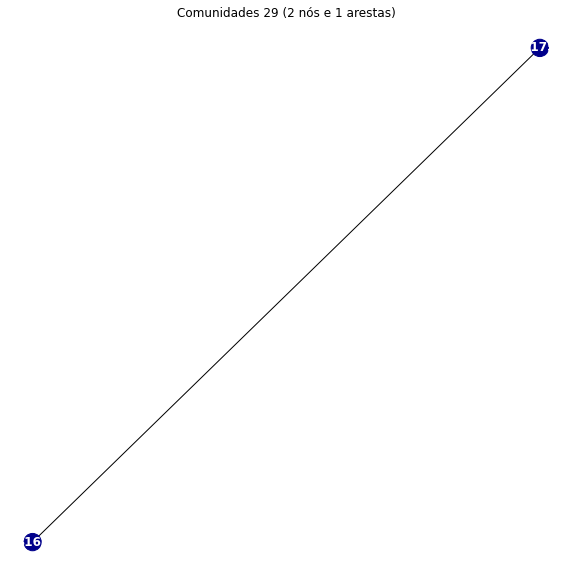

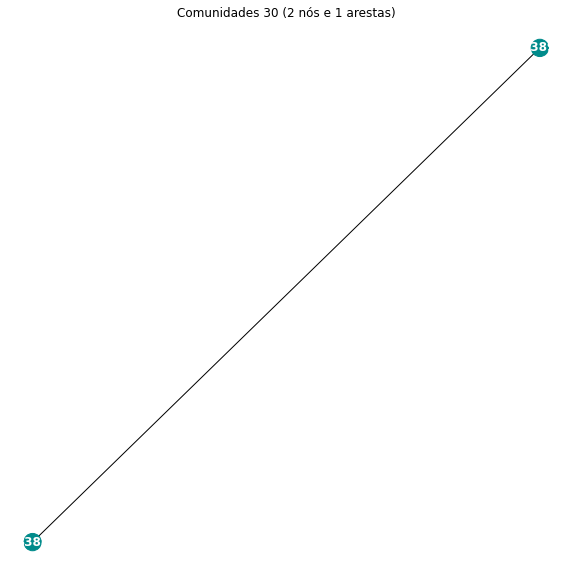

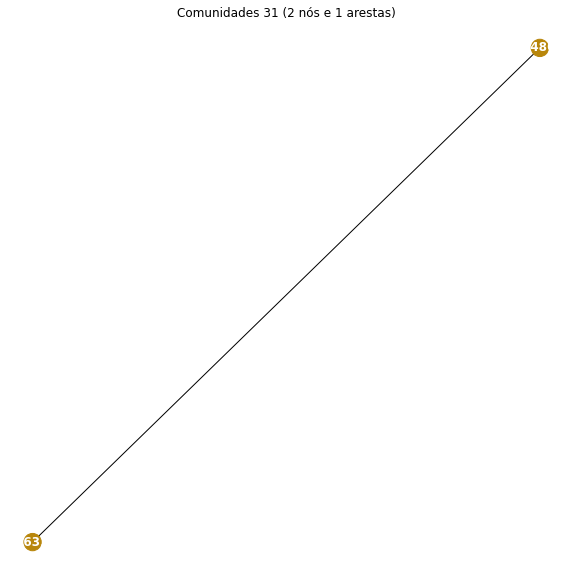

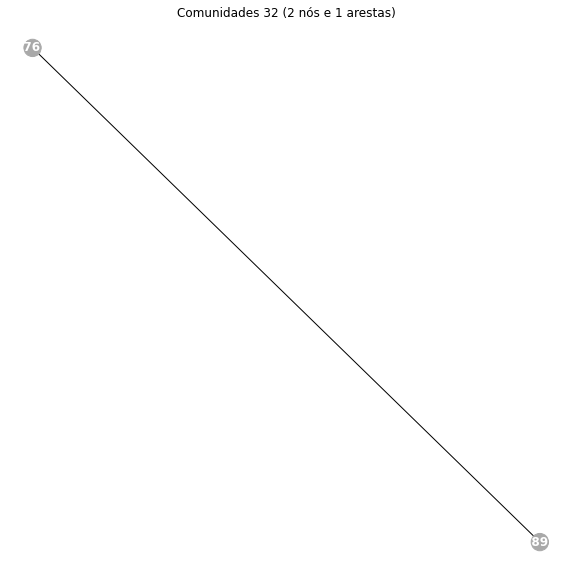

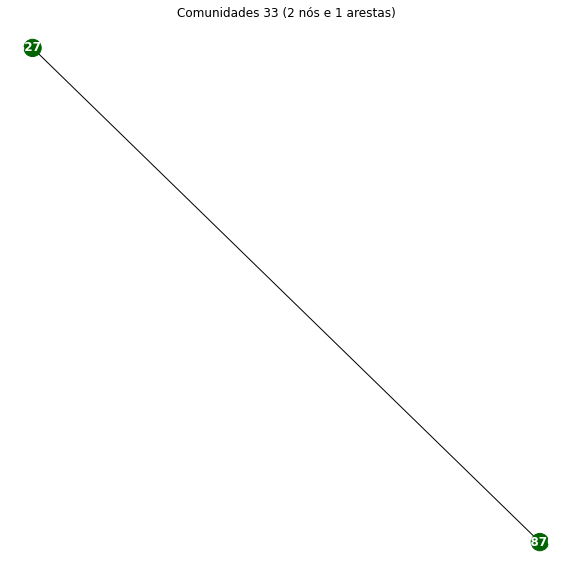

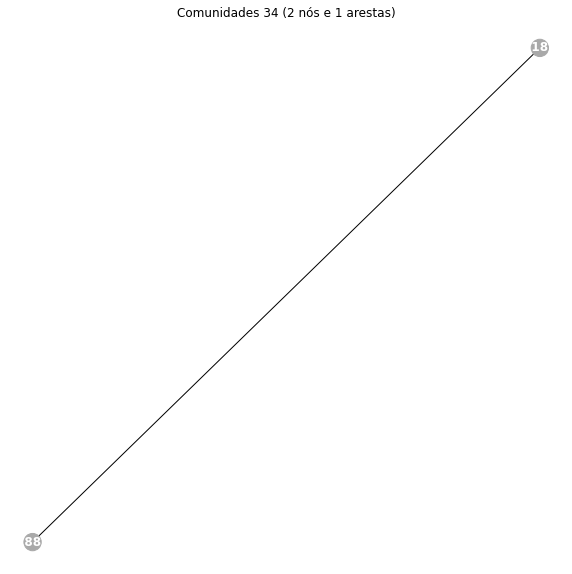

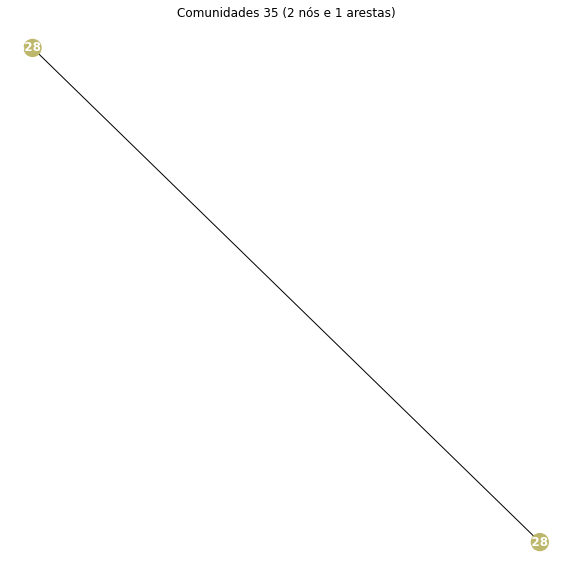

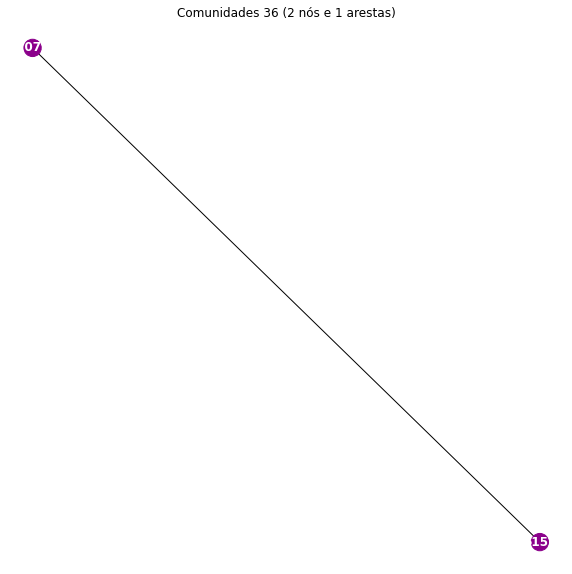

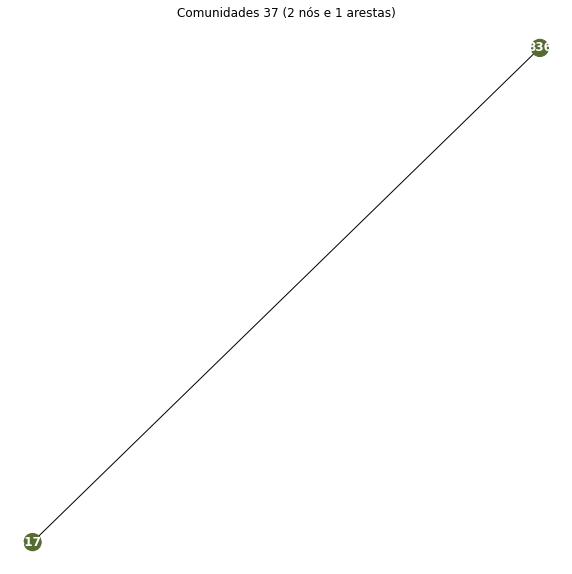

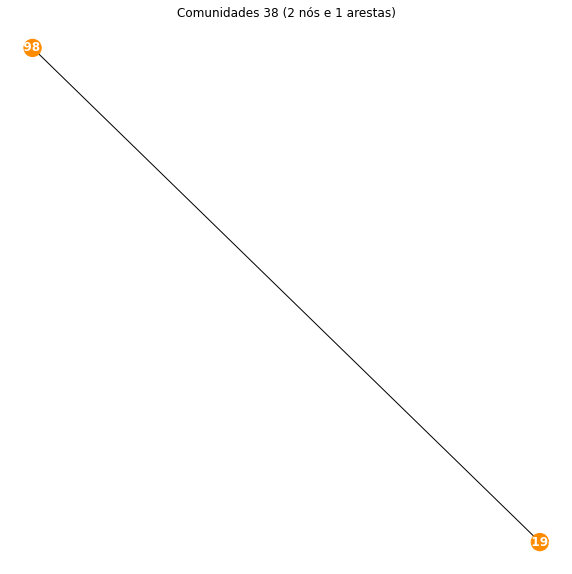

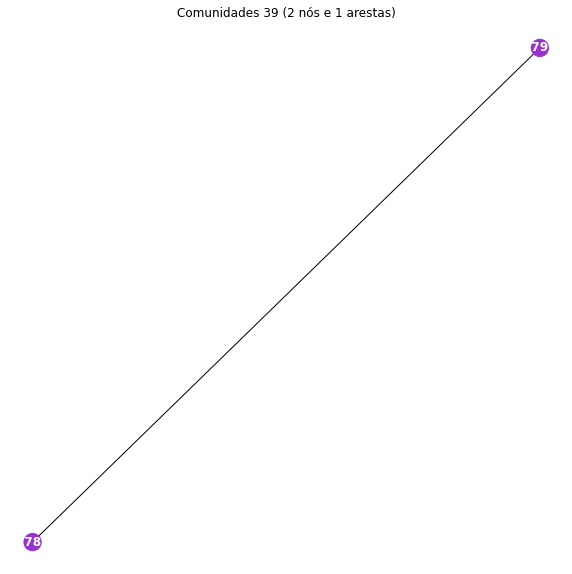

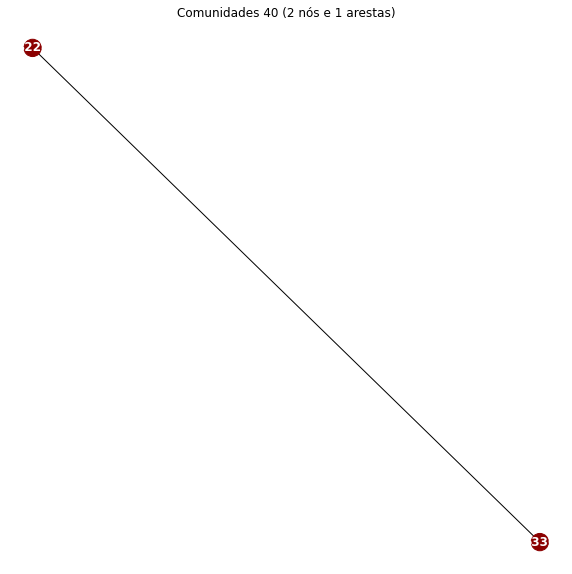

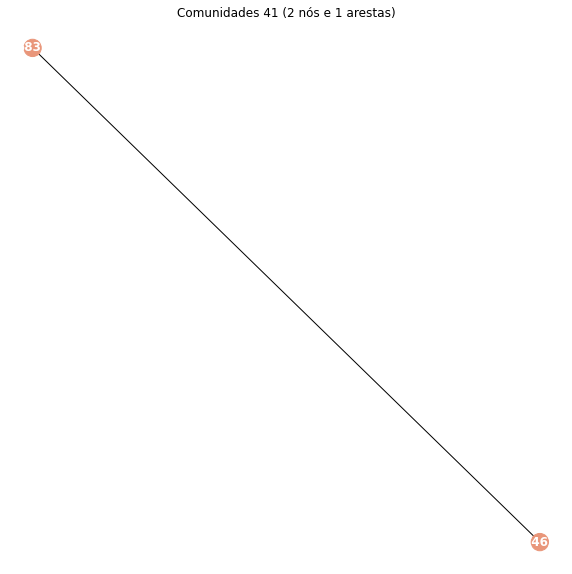

In [219]:
gera_e_mostra_comunidades(G)